
![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 1: Linear Regression Code Assignement

### Student: David McMonagle
### Teacher: Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis (2020-12-21)


Open the original unsolved notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_1/Session_1_Linear_Regression_exercise_NOTSOLVED.ipynb)


An Ecommerce company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They need our help to figure it out! 

**When working on the assignment there could be multiple models to explore data or iplement specific analysis. Choose that you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**

Feel free to add many cells as you need to write your code, comments, answers, etc.



### Import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### Code to avoid cell auto-scrolling

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Read the dataset provided by the company: 
They provide us with a csv file `Ecommerce_Customers.csv`

The dataset contains information about the customers:
    - Email: email of the customer.
    - Address: address of the customer.
    - Avatar: color of the avatar.
    - Avg. Session Length: Average session of in-store style advice sessions.
    - Time on App: Average time spent on App in minutes
    - Time on Website: Average time spent on Website in minutes
    - Length of Membership: How many years the customer has been a member.

In [3]:
#Accessing dataset
import requests
url = 'https://raw.githubusercontent.com/vfp1/bts-cda-2020/main/Session_1/Ecommerce_Customers.csv'
res = requests.get(url, allow_redirects=True)
with open('banking.csv','wb') as file:
    file.write(res.content)
df = pd.read_csv(url)

In [4]:
df.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Exploatory Data analysis

In [6]:
df.shape

(500, 8)

In [7]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

Perform some exploratory data analysis:
    - Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, remove thos variables.
    - Check for missing values
    - check the distribution of the target variable to see if there is some outlier
    - check which are the variables with highest correlation with the target variable
    - check for multi-colinearity

**Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, explain why you think they are useless and remove them.**



Write your answer here:






Yes there is, we are definitley not interested in the 'Email' and 'Avatar' variables as they are personal information which is useless in our case. 
Furthermore, we could potentially keep 'Address' but due to the brief it shouldn't be necessary in this analysis.


In [8]:
customers = df.drop(['Email','Avatar','Address'], axis = 1)

customers.head(5)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
customers.shape

(500, 5)

In [10]:
customers.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

#### Check Missing values

In [11]:
customers.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

As we can see there are no missiong values within this dataset.

#### Check disttribution of the target variable

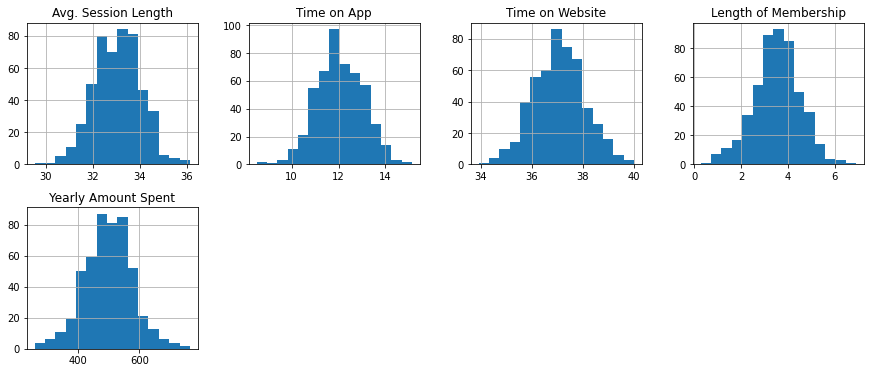

In [12]:
import seaborn as sns
customers.hist(bins=15, figsize=(15, 6), layout=(2, 4));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


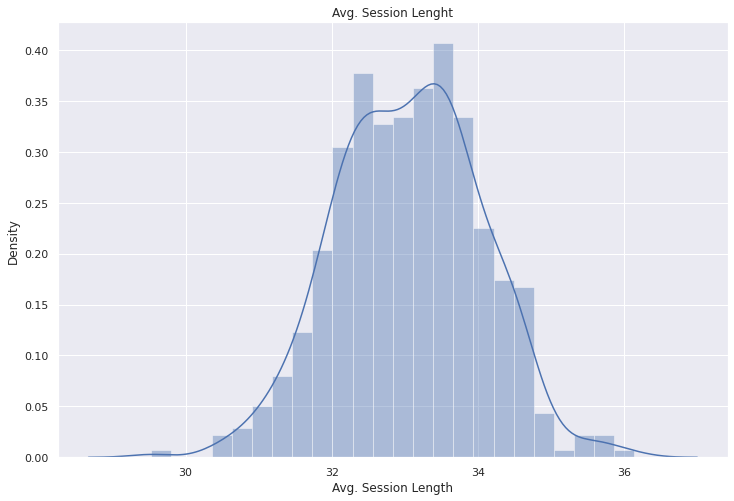

In [13]:
sns.set(rc={'figure.figsize': (12, 8)})
sns.distplot(customers["Avg. Session Length"], bins=24)
plt.title('Avg. Session Lenght')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


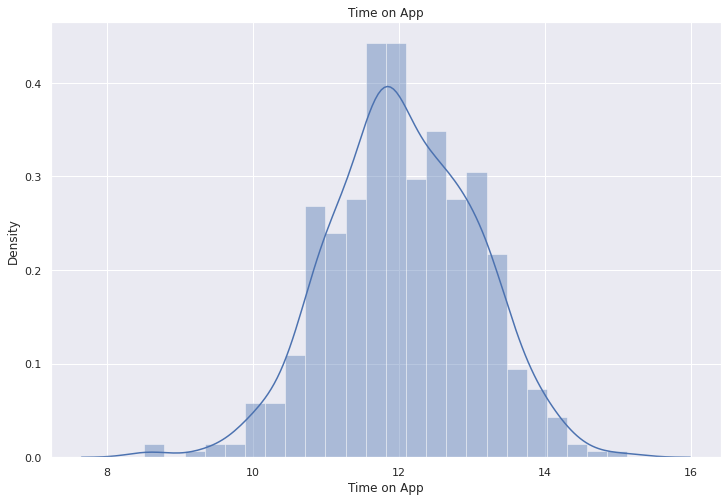

In [14]:
sns.set(rc={'figure.figsize': (12, 8)})
sns.distplot(customers["Time on App"], bins=24)
plt.title('Time on App')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


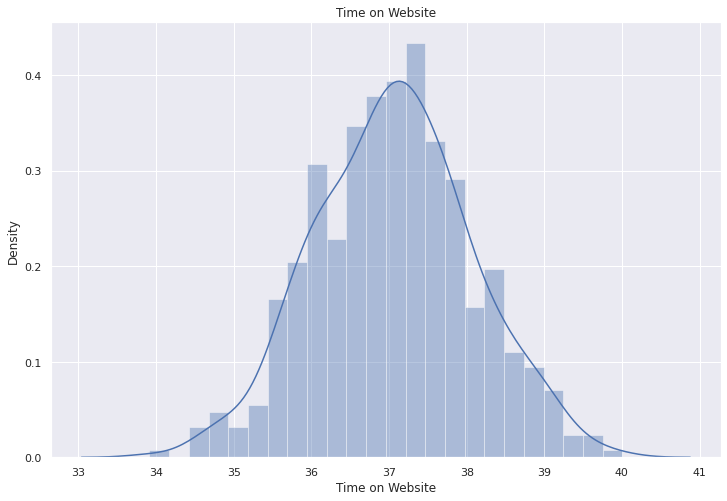

In [15]:
sns.set(rc={'figure.figsize': (12, 8)})
sns.distplot(customers["Time on Website"], bins=24)
plt.title('Time on Website')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


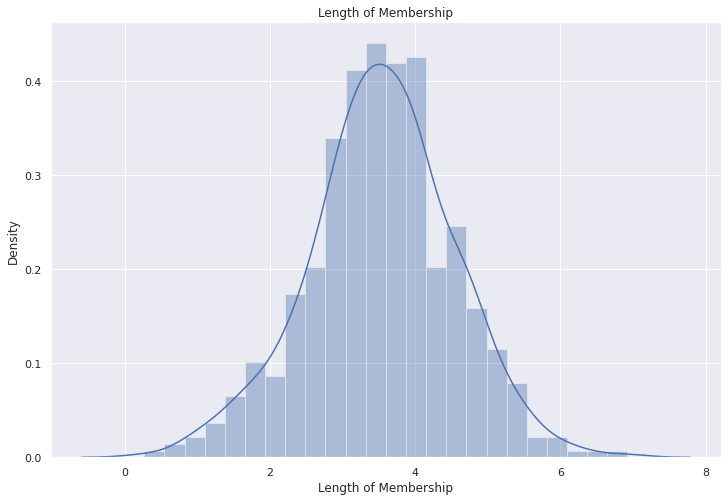

In [16]:
sns.set(rc={'figure.figsize': (12, 8)})
sns.distplot(customers["Length of Membership"], bins=24)
plt.title('Length of Membership')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


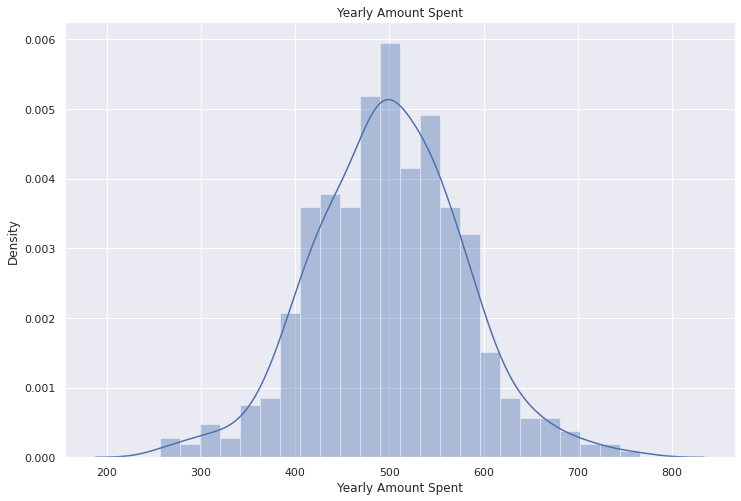

In [17]:
sns.set(rc={'figure.figsize': (12, 8)})
sns.distplot(customers["Yearly Amount Spent"], bins=24)
plt.title('Yearly Amount Spent')
plt.show()

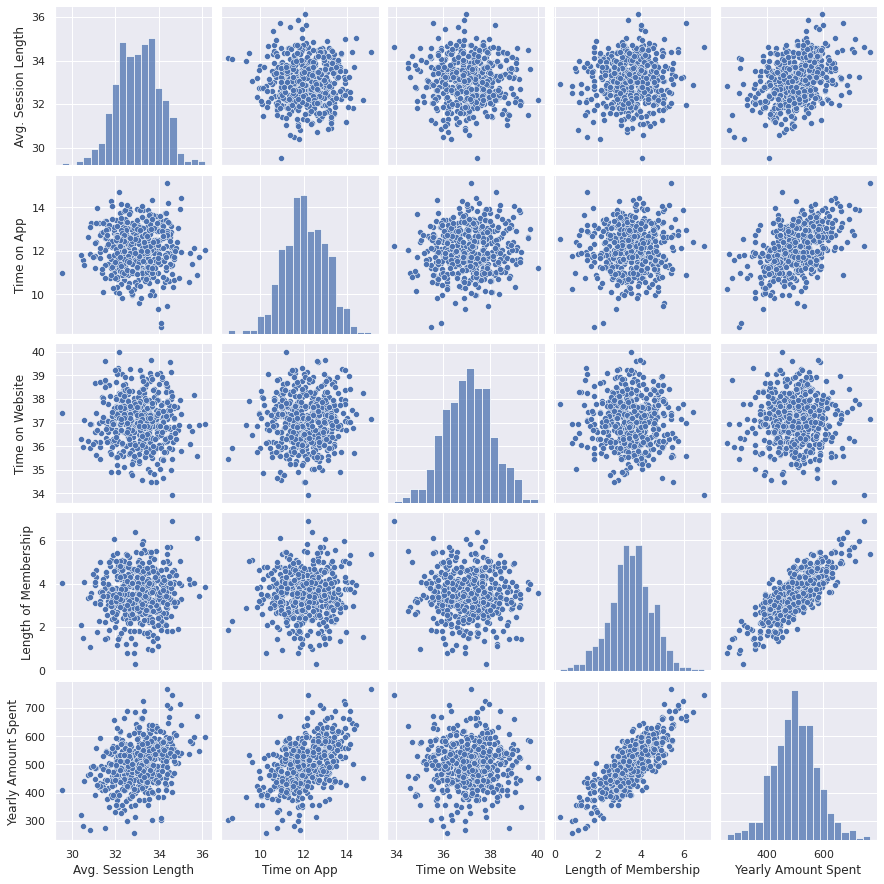

In [18]:
#visualising the relationship between the features using scatter plots
sns.pairplot(customers)

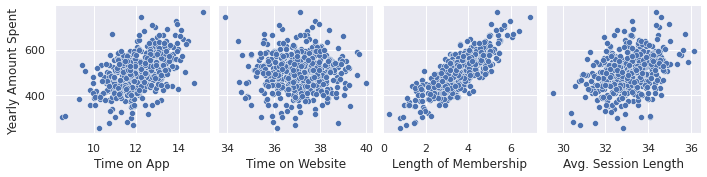

In [19]:
pp = sns.pairplot(data=customers,y_vars=["Yearly Amount Spent"], x_vars=['Time on App','Time on Website','Length of Membership','Avg. Session Length'])

#### Check correlation among variables

Explore the relation between each indipendent variable and the dipendent variable using multiple plots, among them also **jointplot** plots. 
    

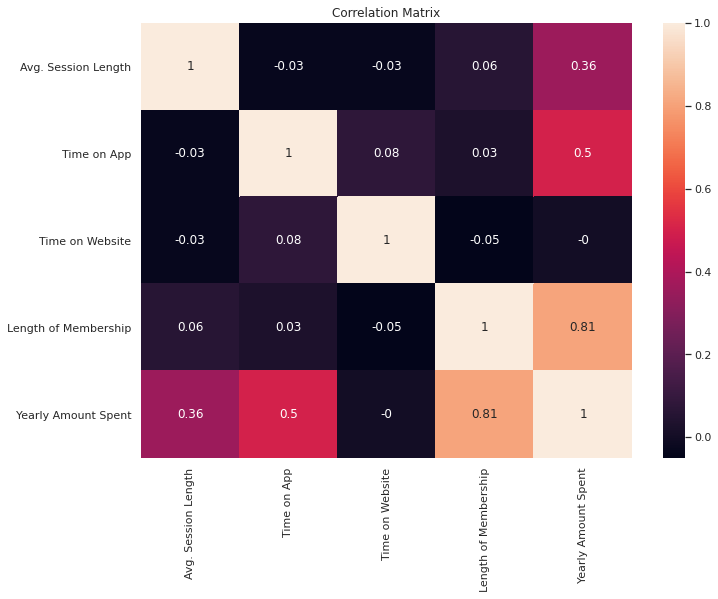

In [20]:
#visualising the relationship between the features using a correlation matrix
correlation_matrix = customers.corr().round(2)
sns.set(rc={'figure.figsize':(11, 8)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

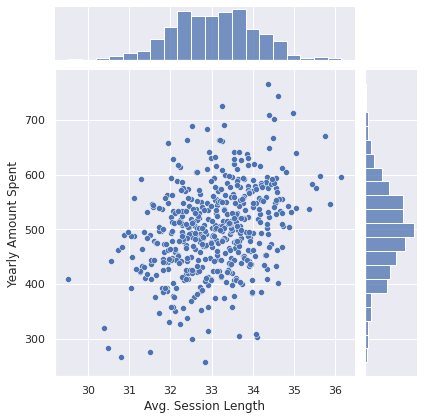

In [21]:
sns.jointplot(data = customers, x = "Avg. Session Length", y = "Yearly Amount Spent")

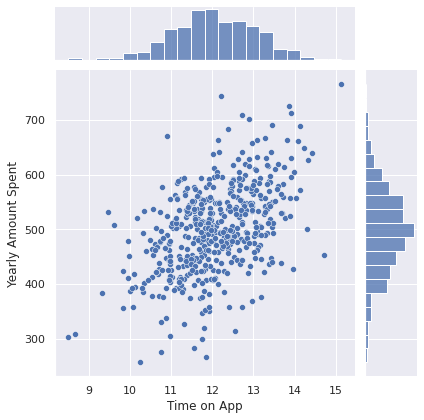

In [22]:
sns.jointplot(data = customers, x = "Time on App", y = "Yearly Amount Spent")

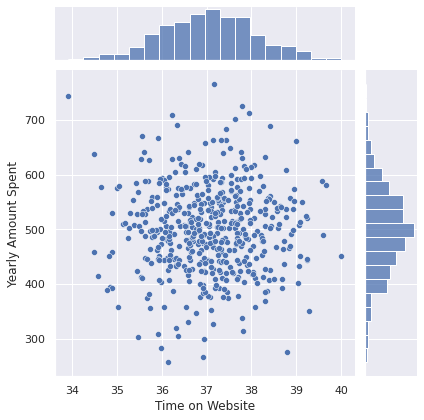

In [23]:
sns.jointplot(data = customers, x = "Time on Website", y = "Yearly Amount Spent")

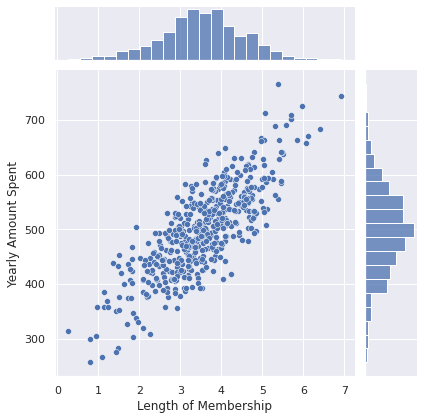

In [24]:
sns.jointplot(data = customers, x = "Length of Membership", y = "Yearly Amount Spent")

## Predictive model

Now that we have explored a bit the data we want to create a predictive model to understand if 
the company should focus more on their mobile app experience or on their website.

Or maybe there is some other apsect that is still more important and and the company should focus on it!!

Let's implement a simple linear regression model (choose the variable you reatin more appropriate and explain why you chose it) and a multivariate model that uses multiple variables. 

Then, based on your preliminary exploratoy data analysis and on the models' results draw your conclusion.

DEPENDANT VARIABLE CHOICE

This is a business and therefore any decision between focusing efforts online or in store will be money driven, by using common sense we can conclude that we should use money spent as the dependant variable. 
In the EDA, it is the variable which is most influenced by the others therefore enforcing my belief it should be the dependant varible.
That is why money spent is being used as the depedant varible.

Furthermore, I have identified "lenght of membership",  "Avg. Session Length" , "Time on Website" and "Time on App" as the most important independant variables. This is because of the correlation and relevance for our research between money spent and these  variables. Thanks to the graphs from before we can safely say there seems to be no multicolinearity between these features.

### Simple linear regression

In [25]:
from sklearn.linear_model import LinearRegression

x_df = customers[['Length of Membership']]
y_df = customers[['Yearly Amount Spent']]

In [26]:
print(x_df.shape)
print(y_df.shape)

(500, 1)
(500, 1)


### Training and test splits
Split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [27]:
from sklearn.model_selection import train_test_split

#Lenght of membership as independant variable
X_train, X_test, y_train, y_test = train_test_split(x_df,y_df, test_size=0.25, random_state=5)


In [28]:
#Checking Data Split Correctly
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 1)
(125, 1)
(375, 1)
(125, 1)


### Training of the model

In [29]:
from sklearn.linear_model import LinearRegression
#Length of Membership
model_appt = LinearRegression()
model_appt.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Make a plot to show how the model fit the training data.

Looking at the plot explain if the coefficients you found make sense

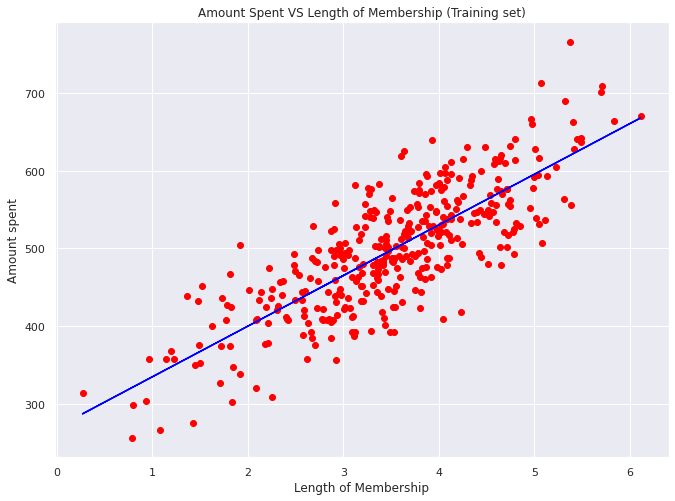

In [30]:
#Model Vs Training Data
predictions = model_appt.predict(X_train)

plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, predictions, color='blue')
plt.title('Amount Spent VS Length of Membership (Training set)')
plt.xlabel('Length of Membership')
plt.ylabel('Amount spent')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


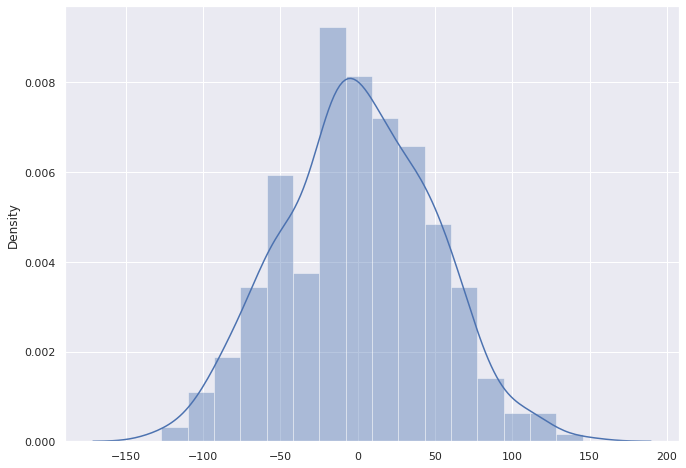

In [31]:
#Residual
sns.distplot((y_train - predictions))

#### Print the coeficients of the model

In [32]:
a = model_appt.score(x_df, y_df)
print('--LENGTH OF MEMBERSHIP--')
print('Coefficient of determination:', a)
print('Intercept:', model_appt.intercept_)
print('Coefficient:', model_appt.coef_)

--LENGTH OF MEMBERSHIP--
Coefficient of determination: 0.6544330974244038
Intercept: [269.65403592]
Coefficient: [[65.14793731]]


### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

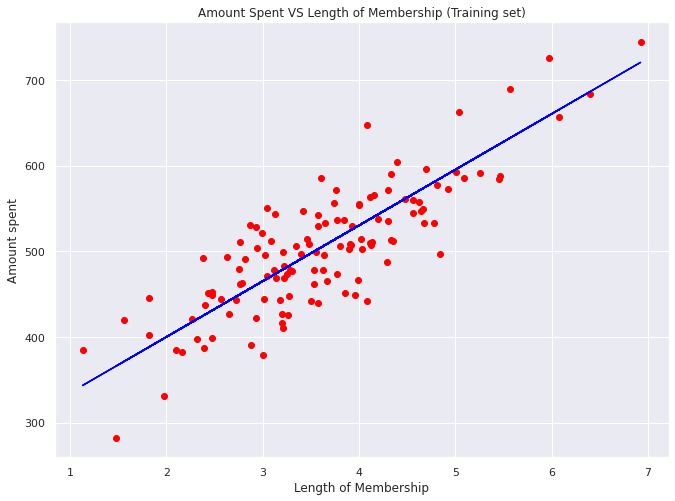

In [33]:
#Model Vs Test Data
predictions_test = model_appt.predict(X_test)

plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, predictions_test, color='blue')
plt.title('Amount Spent VS Length of Membership (Training set)')
plt.xlabel('Length of Membership')
plt.ylabel('Amount spent')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


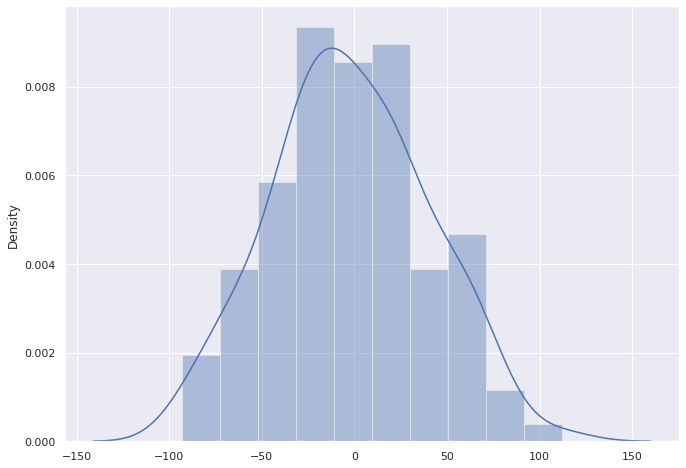

In [34]:
#Residual
sns.distplot((y_test - predictions_test))

#### Evalution Metrics

In [35]:
from sklearn import metrics

y_train_predict = model_appt.predict(X_train)

print("The model performance for training set")
print('MAE ', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE ', metrics.mean_squared_error(y_train,y_train_predict))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_train,y_train_predict)))
print('R2 Score:', metrics.r2_score(y_train,y_train_predict))

print("\n")

y_test_predict = model_appt.predict(X_test)

print("The model performance for testing set")
print('MAE ', metrics.mean_absolute_error(y_test,y_test_predict))
print('MSE ', metrics.mean_squared_error(y_test,y_test_predict))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,y_test_predict)))
print('R2 Score:', metrics.r2_score(y_test,y_test_predict))

The model performance for training set
MAE  38.61651210702132
MSE  2311.193025103836
RMSE  48.074868955659525
R2 Score: 0.6441415581245078


The model performance for testing set
MAE  34.03233090526607
MSE  1744.646561976358
RMSE  41.768966493993574
R2 Score: 0.6889559142164579


## Multivariate Model

In [36]:
xm_df = customers[['Time on App','Time on Website','Length of Membership','Avg. Session Length']]
ym_df = customers[['Yearly Amount Spent']]

In [37]:
print(xm_df.shape)
print(ym_df.shape)

(500, 4)
(500, 1)


### Training and test splits
Next, we split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [38]:
from sklearn.model_selection import train_test_split

xm_train, xm_test, ym_train, ym_test = train_test_split(xm_df,ym_df, random_state=5)
print(xm_train.shape)
print(ym_train.shape)
print(xm_test.shape)
print(ym_test.shape)

(375, 4)
(375, 1)
(125, 4)
(125, 1)


### Training of the model

In [39]:
from sklearn.linear_model import LinearRegression

model_multi = LinearRegression()
model_multi.fit(xm_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Print the coeficients of the model

In [40]:
coef = model_multi.coef_[0]

pd.DataFrame(coef, 
             xm_df.columns, 
             columns=['Coeficients'])\
            .sort_values(by='Coeficients', ascending=False)

,Coeficients
Length of Membership,61.788447
Time on App,38.485864
Avg. Session Length,25.934336
Time on Website,0.497176


In [41]:
b = model_multi.score(xm_df, ym_df)
print('--Multivariate--')
print('Coefficient of determination:', b)
print('Intercept:', model_multi.intercept_)

--Multivariate--
Coefficient of determination: 0.9842899540467984
Intercept: [-1058.34843704]


### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

In [42]:
predictionsm_train = model_multi.predict(xm_train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


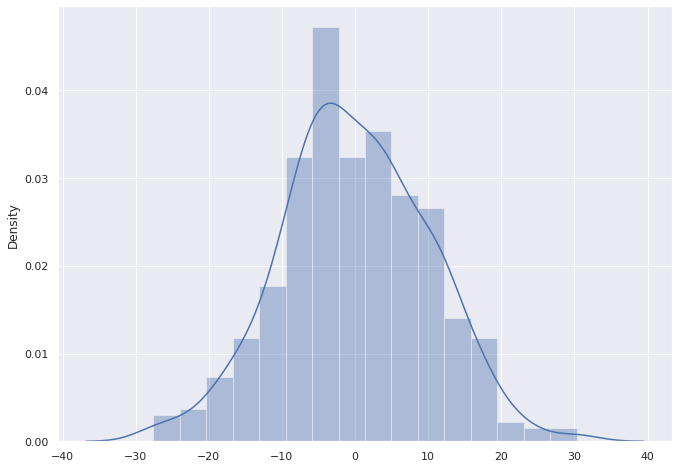

In [43]:
#Residual
sns.distplot((ym_train - predictionsm_train))

In [44]:
predictionsm_test = model_multi.predict(xm_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


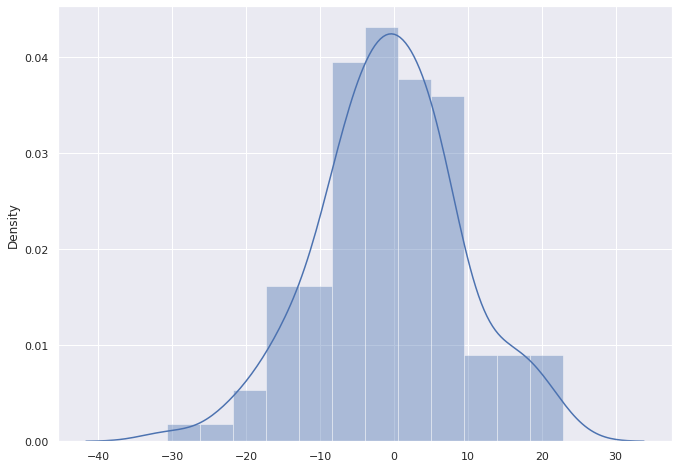

In [45]:
#Residual
sns.distplot((ym_test - predictionsm_test))

#### Evalution Metrics

In [46]:
from sklearn import metrics

ym_train_predict = model_multi.predict(xm_train)

print("The multivariate model performance for training set")
print('MAE ', metrics.mean_absolute_error(ym_train,ym_train_predict))
print('MSE ', metrics.mean_squared_error(ym_train,ym_train_predict))
print('RMSE ', np.sqrt(metrics.mean_squared_error(ym_train,ym_train_predict)))
print('R2 Score:', metrics.r2_score(ym_train,ym_train_predict))

print("\n")

ym_test_predict = model_multi.predict(xm_test)

print("The multivariate model performance for testing set")
print('MAE ', metrics.mean_absolute_error(ym_test,ym_test_predict))
print('MSE ', metrics.mean_squared_error(ym_test,ym_test_predict))
print('RMSE ', np.sqrt(metrics.mean_squared_error(ym_test,ym_test_predict)))
print('R2 Score:', metrics.r2_score(ym_test,ym_test_predict))

The multivariate model performance for training set
MAE  8.044636220459513
MSE  100.58967414906893
RMSE  10.02944037068215
R2 Score: 0.9845120315254313


The multivariate model performance for testing set
MAE  7.420869348688961
MSE  92.75754400896385
RMSE  9.631071799595507
R2 Score: 0.983462733309656


#### Which model has better performance?

In [47]:
from sklearn import metrics

y_train_predict = model_appt.predict(X_train)

print("The model performance for training set")
print('MAE ', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE ', metrics.mean_squared_error(y_train,y_train_predict))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_train,y_train_predict)))
print('R2 Score:', metrics.r2_score(y_train,y_train_predict))

print("\n")

y_test_predict = model_appt.predict(X_test)

print("The model performance for testing set")
print('MAE ', metrics.mean_absolute_error(y_test,y_test_predict))
print('MSE ', metrics.mean_squared_error(y_test,y_test_predict))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,y_test_predict)))
print('R2 Score:', metrics.r2_score(y_test,y_test_predict))

print("\n")

ym_train_predict = model_multi.predict(xm_train)

print("The multivariate model performance for training set")
print('MAE ', metrics.mean_absolute_error(ym_train,ym_train_predict))
print('MSE ', metrics.mean_squared_error(ym_train,ym_train_predict))
print('RMSE ', np.sqrt(metrics.mean_squared_error(ym_train,ym_train_predict)))
print('R2 Score:', metrics.r2_score(ym_train,ym_train_predict))

print("\n")

ym_test_predict = model_multi.predict(xm_test)

print("The multivariate model performance for testing set")
print('MAE ', metrics.mean_absolute_error(ym_test,ym_test_predict))
print('MSE ', metrics.mean_squared_error(ym_test,ym_test_predict))
print('RMSE ', np.sqrt(metrics.mean_squared_error(ym_test,ym_test_predict)))
print('R2 Score:', metrics.r2_score(ym_test,ym_test_predict))

The model performance for training set
MAE  38.61651210702132
MSE  2311.193025103836
RMSE  48.074868955659525
R2 Score: 0.6441415581245078


The model performance for testing set
MAE  34.03233090526607
MSE  1744.646561976358
RMSE  41.768966493993574
R2 Score: 0.6889559142164579


The multivariate model performance for training set
MAE  8.044636220459513
MSE  100.58967414906893
RMSE  10.02944037068215
R2 Score: 0.9845120315254313


The multivariate model performance for testing set
MAE  7.420869348688961
MSE  92.75754400896385
RMSE  9.631071799595507
R2 Score: 0.983462733309656


Write your answer here:


*   The MAE is lower in the multivariate regression, which means the average of the residuals is lower.
*   The MSE is substantially lower in the multivariate regression, this means the error was therefor variance.
*   The RMSE is also lower in the multivariate regression, which means it has a smaller standard deviation of residuals.
*   The R-squared score is very good for the multivariate regression, especially compared to the simple model.

From all of these results we can conclude that the multivariate model is better. 









**Describe how you interpret the coefficients of the model and based on that decide how the company shoud behave in order to try to improve their business increasing the `Yearly Amount Spent` per customenr.**

Write your answer here:


The coefficients indicate that, while holding all other values constant, a unitary rise in the selected feature will lead to a change in money spent equal to that of the coefficient.


*   **Length of Membership**: for every year extra a customer has, they are estimated to spend 61.78 more a year.
*   **Time on App**: for every hour (assuming the unit is hours) a customer spends on the app, they are estimated to spend 38.49 more a year.
*   **Avg. Session Time**: for every minute spent on average per session, the customer is estimated to spend 25.93 more.
*   **Time on Website**: for every hour (assuming the unit is hours) a customer spends on the website, they are estimated to spend 0.49 more a year. 














This analysis has led me to conclude that the company should focus it's energy on the app experience over the website. This is because for every hour spent on the app by the customer they are estimated to spend approximately 78.5% more than for every hour spent on the website. Though we must not ignore the effect length of membership has on money spent, therefore the company should probably re-evaluate their plan of action and focus on retaining and growing customer membership.